In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


def team_to_int_dict():
    teams = list(Game.objects.all().values_list('team', flat=True).distinct())
    return {team:teams.index(team) for team in teams}

def prep_model_input(player_list):
    player_stats =  np.array([[team_ids[stat.game.team], 
                               stat.game.home] 
                               for stat in player_list])
    player_names = [stat.player.name for stat in player_list]
    return player_stats, player_names


def create_predictions(train_input, train_answer, test_input):
    rfc = RandomForestClassifier ()
    rfc.fit(train_input, train_answer)
    return rfc.predict(test_input)
    

def plot_pred_actual(player_stat, predicted, test_answer, player_labels):
    plt.figure(figsize=(13,7))
    plt.title(player_stat)
    plt.plot(test_answer, 'g', label='Actual')
    plt.plot(predicted, 'r', label='Predicted')
    label_length = range(len(player_labels))
    plt.xticks(label_length, player_labels)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def get_train_test_players():
    train_players = PlayerData.objects.filter(game__week__lte=13)
    test_players = PlayerData.objects.filter(game__week=14)
    return train_players, test_players

def player_stat_arrays(player_list):
    final_dict = player_list[0].to_dict()
    final_dict = {stat_name:np.array([]) for stat_name in final_dict.keys()}
    for player in player_list:
        player_dict = player.to_dict()
        for stat in final_dict.keys():
            new_list = np.append(final_dict[stat], [player_dict[stat]])
            final_dict[stat] = new_list
    return final_dict

def predict_players():
    train_players, test_players = get_train_test_players()
    train_input, train_player_names = prep_model_input(train_players)
    test_input, test_player_names = prep_model_input(test_players)
    train_players_dict = player_stat_arrays(train_players)
    test_players_dict = player_stat_arrays(test_players)

    for player_stat in train_players_dict.keys():
        predicted = create_predictions(train_input, train_players_dict[player_stat], test_input)
        accuracy = accuracy_score(test_players_dict[player_stat], predicted)
        plot_pred_actual(player_stat, predicted, test_players_dict[player_stat], test_player_names)
        print('{} accuracy score = {}'.format(player_stat, accuracy))

team_ids = team_to_int_dict()

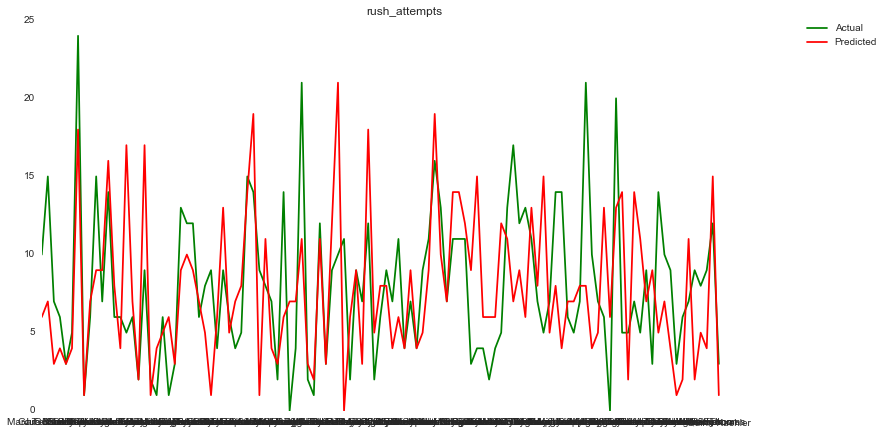

rush_attempts accuracy score = 0.07964601769911504


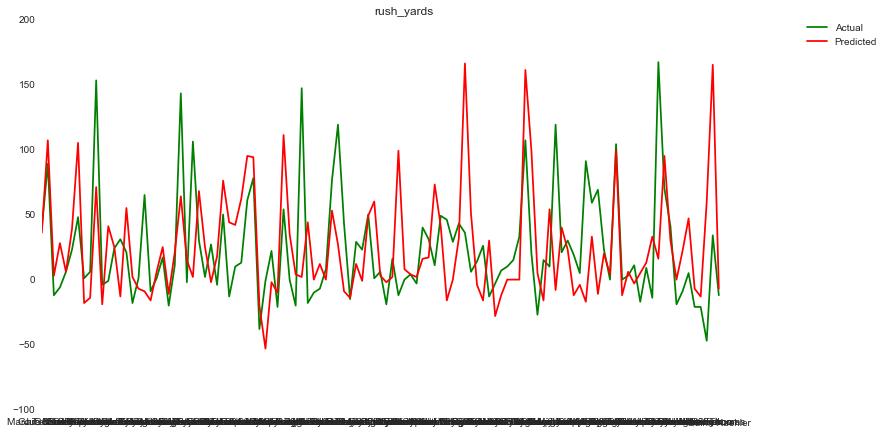

rush_yards accuracy score = 0.017699115044247787


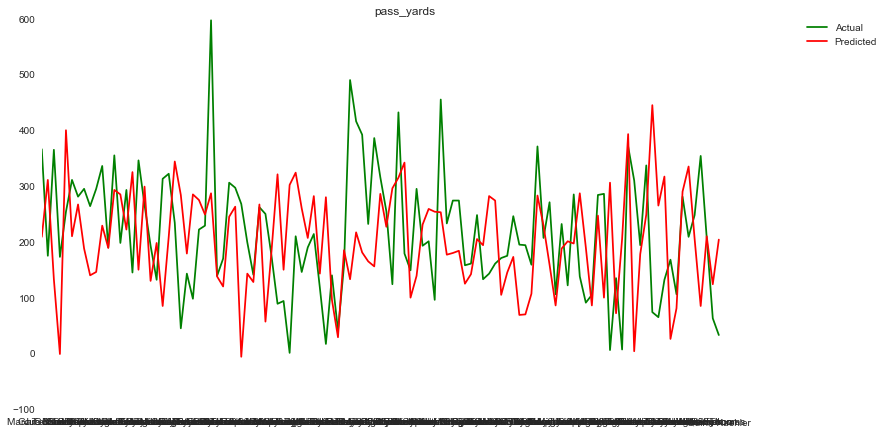

pass_yards accuracy score = 0.0


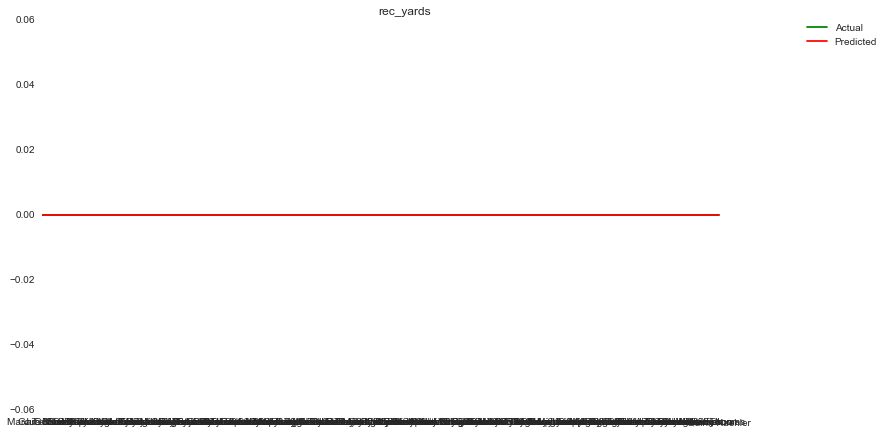

rec_yards accuracy score = 1.0


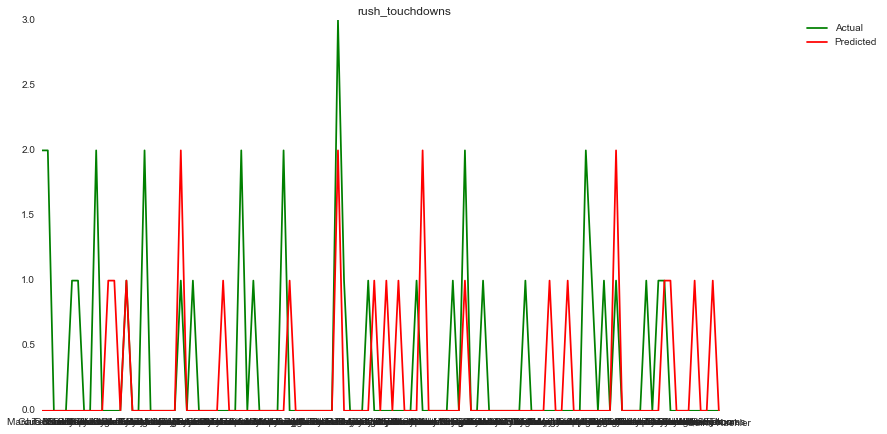

rush_touchdowns accuracy score = 0.6637168141592921


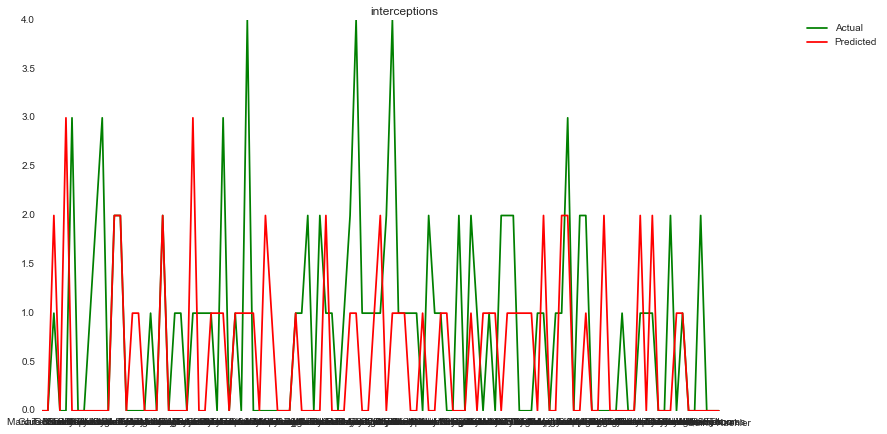

interceptions accuracy score = 0.415929203539823


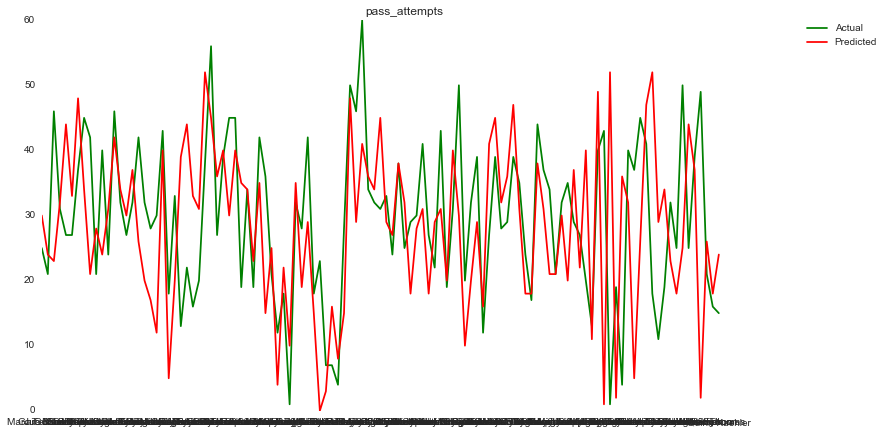

pass_attempts accuracy score = 0.02654867256637168


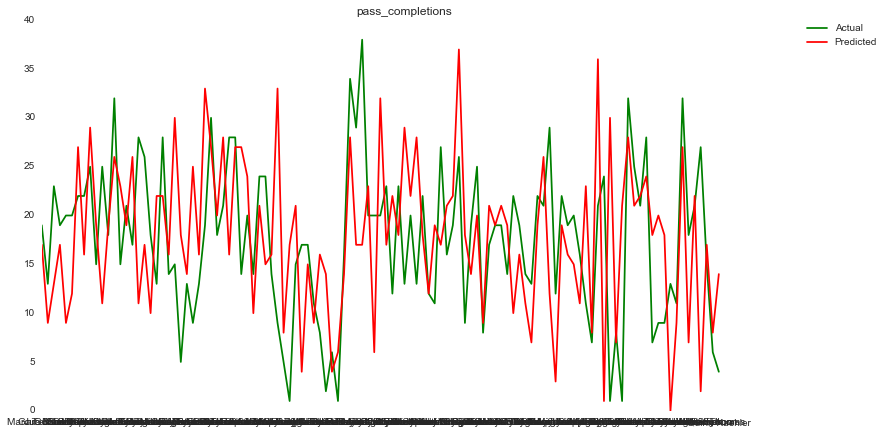

pass_completions accuracy score = 0.017699115044247787


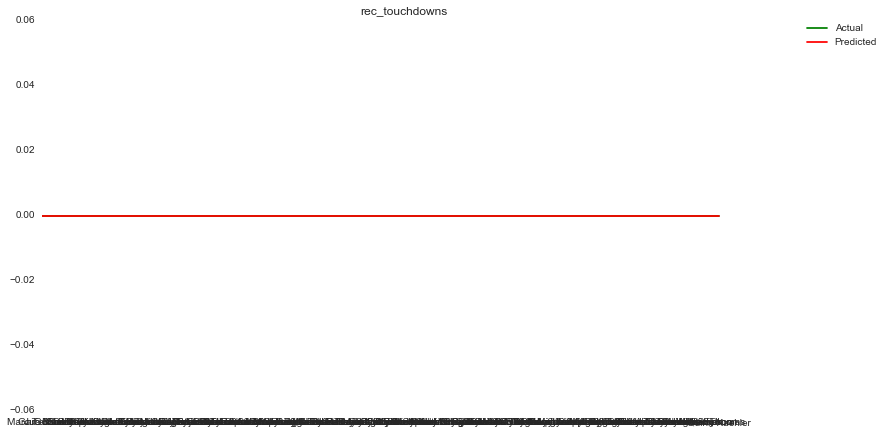

rec_touchdowns accuracy score = 1.0


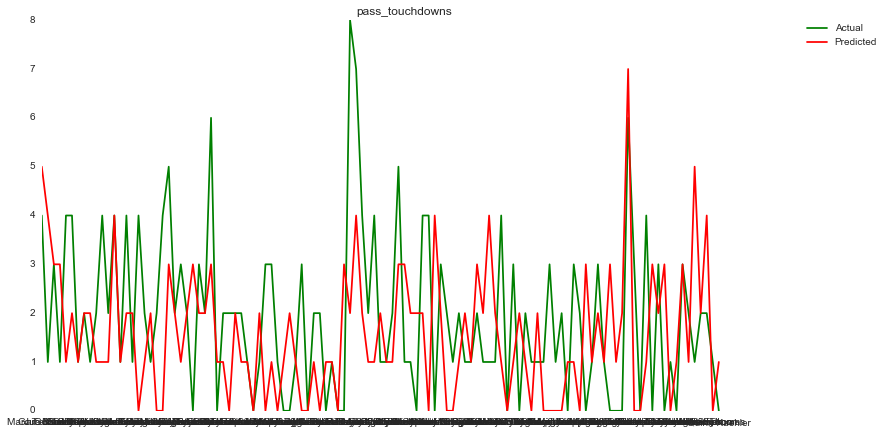

pass_touchdowns accuracy score = 0.20353982300884957


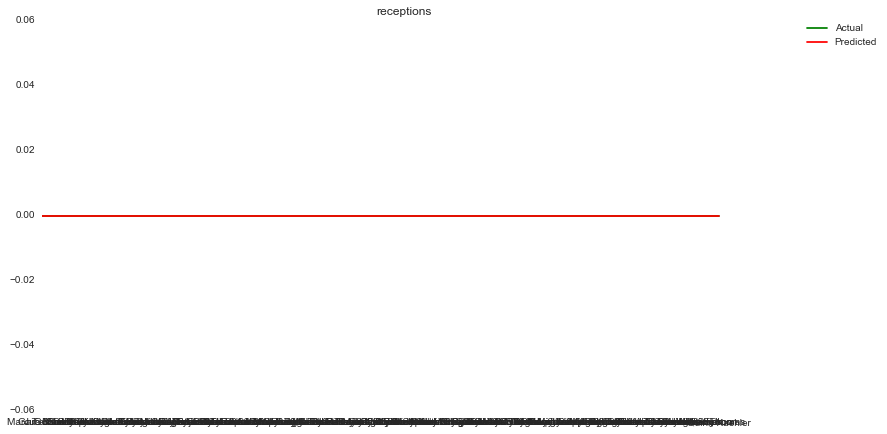

receptions accuracy score = 1.0


In [10]:
predict_players()